In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


# Assignment 4

1. 1. To see some of the issues with calling `.plot()` on an entire dataframe without considering carefully what the columns contain, try `df2.plot()` using the `df2` dataframe of prices from above.  Why does this occur?  
  2. Create a vertically stacked set of two graphs using `df2`:  the top graph will contain all of the price data together, and the bottom graph will contain the volume data.  Choose different colours for each data set.  (Note: you can use hex colour codes when defining colours, e.g.: `color=#19F0B9`.  You can use the following RGB to Hex converter http://www.rgbtohex.net/)
  
2. Use the file customer_data.csv to perform the exercise.    
  1. Create a new DataFrame called construction which contains all the customers in the "Construction" industry with over 0 spend on mobility products. Using this DataFrame, create a scatterplot with Mobility revenue on the vertical axis and number of employees on the horizontal axis. Does this tell you anything about the relationship between Mobility revenue and number of employees? What does it tell you?
   2. Copy the code from part (1) and add in two lines underneath: plt.xscale('log') and plt.yscale('log'). These two lines rescale the axes so that instead of showing the raw figures, the logarithm of the figures is shown instead. This is often a useful transformation for data that is extremely skewed. How does the rescaled plot differ from the plot you created in part 1? Why? Can you discern anything about the relationship between Mobility revenue and number of employees that you couldn't before?
   3. Repeat parts (1) and (2) for the Agriculture industry. How does the relationship between Mobility and number of employees differ in this industry from the Construction industry? Why do you think that might be?
   
3. 1. Create a 3d scatter plot where the $x$-values range from $-2$ to $4$, the $y$-values are the cosine-squared of $x$, and the $z$ values are the sine of the difference of $x$ and $y$.  Set the step size for $x$ to be at most $0.01$.  
   2. Using the `meshgrid` method, graph a wireframe *hyperbolic paraboloid* for $a=\sqrt{3}$, $b=2$.  (Have the $xy$ values range from at least $-10$ to $10$ to see the structure properly.)

## 1.A.

In [2]:
df2 = pd.read_csv('c:\\users\\patrick\\dropbox\\brainstation\\data science course\\timeseries_1.csv',index_col=0,parse_dates=True)

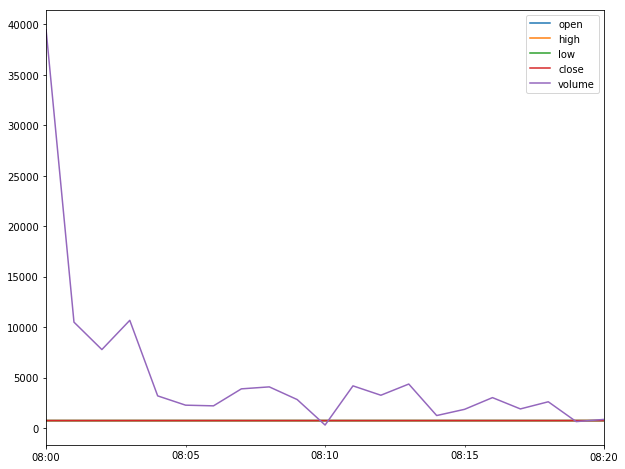

In [3]:
df2.plot();

The issue here is that the scale of the volume is very different from the scale of the prices.  When plotting them all together in a single graph, the prices get condensed to make sure there is enough room for the volume values.

## 1.B.

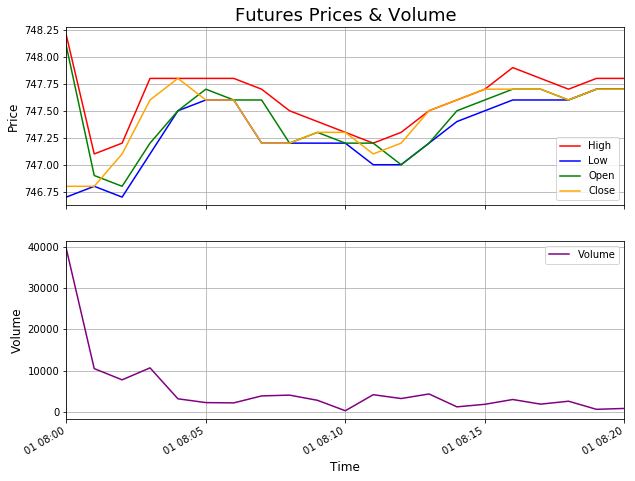

In [4]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
# set up subplot grid; how many rows and columns
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0))  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.plot(df2.index,df2['open'],label='Open', color='green')
plt.plot(df2.index,df2['close'],label='Close', color='orange')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices & Volume',size=18)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((2,1), (1,0))
plt.plot(df2.index,df2['volume'],label='Volume', color='purple')
plt.xlabel('Time', size=12)
plt.ylabel('Volume',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.show()

## 2.A

In [4]:
df = pd.read_csv('customer_info.csv')
construct = df[(df["INDUSTRY"] == 'Construction') & (df["MOBILITY"] > 0)]
construct.plot(x = "EMP", y = "MOBILITY", kind = "scatter");

FileNotFoundError: File b'customer_info.csv' does not exist

## 2.B.

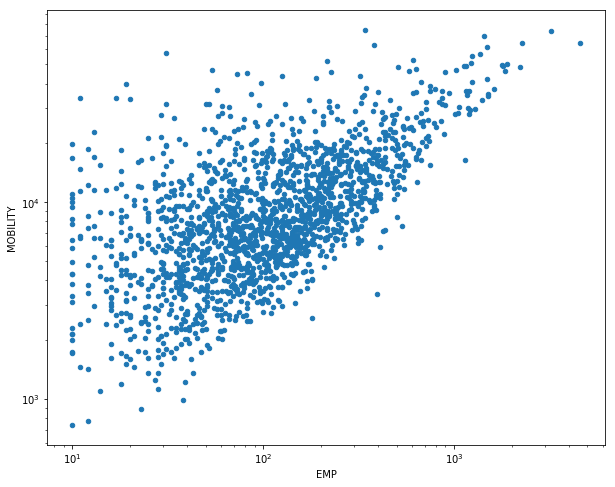

In [6]:
construct = df[(df["INDUSTRY"] == 'Construction') & (df["MOBILITY"] > 0)]
construct.plot(x = "EMP", y = "MOBILITY", kind = "scatter")
plt.xscale('log')
plt.yscale('log')

## 2.C.

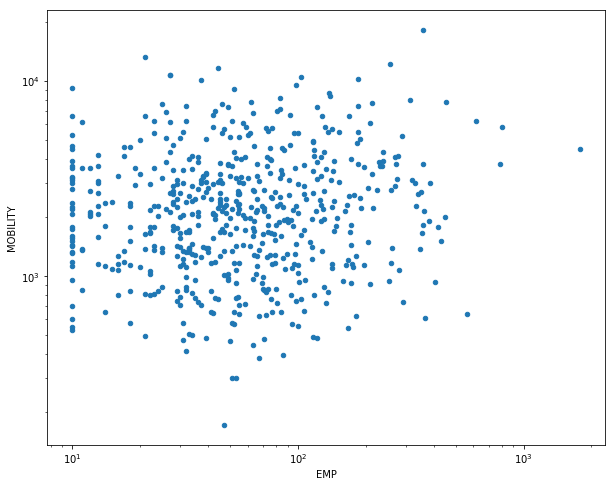

In [7]:
food = df[(df["INDUSTRY"] == 'Agriculture') & (df["MOBILITY"] > 0)]
food.plot(x = "EMP", y = "MOBILITY", kind = "scatter")
plt.xscale('log')
plt.yscale('log')

## 3.A.

In [9]:
import mpl_toolkits.mplot3d as m3d

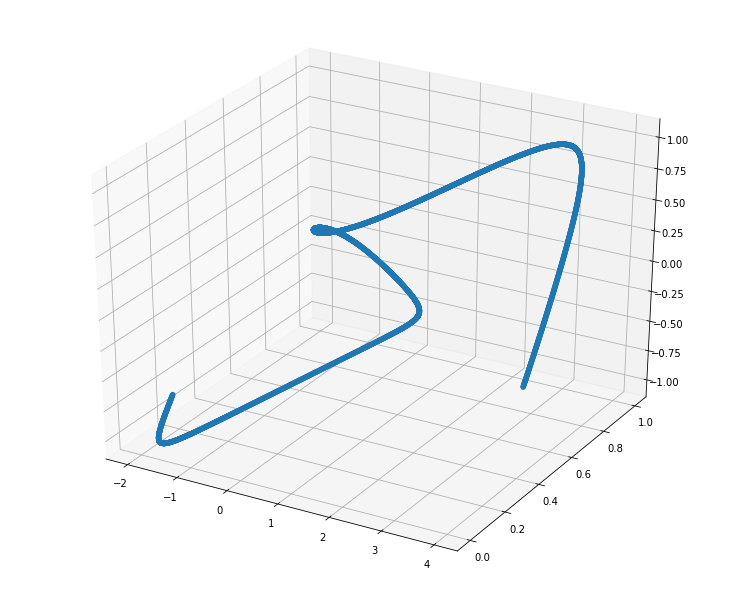

In [10]:
x = np.arange(-2,4,0.001)
y = np.cos(x)**2
z = np.sin(x-y)
fig3d = m3d.Axes3D(plt.figure())
fig3d.scatter3D(x,y,z)
plt.show()

## 3.B.

An hyperbolic paraboloid is of the form $$ z = \frac{y^2}{b^2} - \frac{x^2}{a^2}$$.

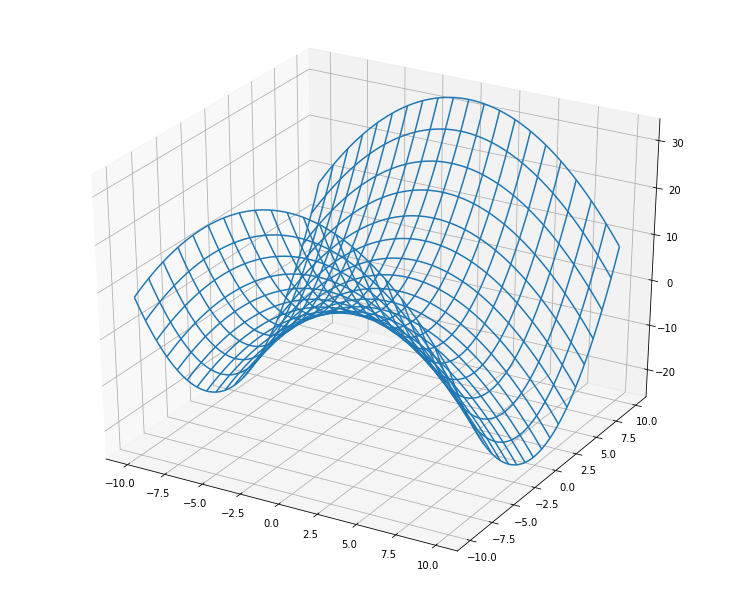

In [11]:
X = np.arange(-10,10,0.1)
Y = np.arange(-10,10,0.1)
xx, yy = np.meshgrid(X, Y);
Z = yy**2/3 - xx**2/4
ax = m3d.Axes3D(plt.figure())
ax.plot_wireframe(xx, yy, Z, rstride=10, cstride=10);
plt.show();